In [193]:
import numpy as np
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Gauss Jordan dengan perulangan

In [194]:
# Grafik untuk menyimpan data
n_values = []
recursive_times = []
iterative_times = []

# Fungsi untuk memperbarui grafik
def update_graph():
    plt.figure(figsize=(8, 6))
    plt.plot(n_values, recursive_times, label='Recursive', marker='o', linestyle='-')
    plt.plot(n_values, iterative_times, label='Iterative', marker='o', linestyle='-')
    plt.title('Performance Comparison: Recursive vs Iterative')
    plt.xlabel('Input (n)')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [195]:
def print_execution_table():
    table = PrettyTable()
    table.field_names = ["n", "Recursive Time (s)", "Iterative Time (s)"]
    # Use the minimum length of all lists to avoid the IndexError
    min_len = min(len(n_values), len(recursive_times), len(iterative_times))
    for i in range(min_len):
        table.add_row([n_values[i], recursive_times[i], iterative_times[i]])
    print(table)

In [196]:
def iterative_gauss(a):
  n = len(a) - 1
  for i in range(n):
      if a[i][i] == 0.0:
          swapped = False
          for swap_row in range(i+1, n):
              if a[swap_row][i] != 0.0:
                  a[[i, swap_row]] = a[[swap_row, i]]  # Tukar baris
                  swapped = True
                  #print(f"Menukar baris {i} dengan baris {swap_row}")
                  break
          if not swapped:
              #print(f"Kesalahan: Elemen diagonal di baris {i} tetap nol! Tidak dapat menyelesaikan.")
              break
      pivot = a[i][i]
      a[i] = a[i] / pivot
      #print(f"Normalisasi baris {i}:")
      #print(a)
      for j in range(n):
          if i != j:
              ratio = a[j][i]
              a[j] = a[j] - ratio * a[i]
              #print(f"Eliminasi elemen di baris {j}, kolom {i}:")
              #print(a)
  else:
      #print("Matriks setelah eliminasi Gauss:")
      return a
      solution = a[:, -1]
      #print("Solusi sistem persamaan:")
      #print(solution)

Gauss jordan dengan rekursif


In [197]:
"""Gauss jordan dengan rekursif

"""

def normalize(matrix, row):
    """
    Rekursif untuk menormalisasi baris pivot `row`.
    """
    if matrix[row][row] == 1:
        return

    pivot = matrix[row][row]
    matrix[row] = matrix[row] / pivot

    # Rekursif selesai setelah baris sudah dinormalisasi
    return

def eliminate(matrix, row, col=0):
    """
    Rekursif untuk mengeliminasi elemen di kolom `row` untuk semua baris `col`.
    """
    if col >= len(matrix):
        return

    if col != row:
        ratio = matrix[col][row]
        matrix[col] = matrix[col] - ratio * matrix[row]

    # Panggil eliminasi untuk baris berikutnya
    eliminate(matrix, row, col + 1)

def swap_rows(matrix, row, swap_row=0):
    """
    Rekursif untuk mencari dan menukar baris jika elemen diagonal bernilai nol.
    """
    if swap_row >= len(matrix):
        return False  # Tidak ada baris yang dapat ditukar

    if matrix[swap_row][row] != 0.0:
        matrix[[row, swap_row]] = matrix[[swap_row, row]]
        return True

    # Rekursif untuk memeriksa baris berikutnya
    return swap_rows(matrix, row, swap_row + 1)

def gauss_elimination_recursive(matrix, row=0):
    """
    Rekursif untuk eliminasi Gauss.
    - matrix: Matriks augmented.
    - row: Baris pivot saat ini.
    """
    if row >= len(matrix):
        return matrix

    if matrix[row][row] == 0.0:
        if not swap_rows(matrix, row, row + 1):
            #print(f"Kesalahan: Elemen diagonal di baris {row} tetap nol! Tidak dapat menyelesaikan.")
            return matrix

    normalize(matrix, row)
    eliminate(matrix, row)

    # Rekursif untuk baris berikutnya
    return gauss_elimination_recursive(matrix, row + 1)

+----+------------------------+------------------------+
| n  |   Recursive Time (s)   |   Iterative Time (s)   |
+----+------------------------+------------------------+
| 3  | 2.5033950805664062e-05 | 5.9604644775390625e-06 |
| 4  | 2.002716064453125e-05  | 1.0967254638671875e-05 |
| 5  | 2.9087066650390625e-05 |  1.71661376953125e-05  |
| 6  | 4.076957702636719e-05  | 2.6226043701171875e-05 |
| 7  | 5.507469177246094e-05  | 3.719329833984375e-05  |
| 8  | 7.987022399902344e-05  | 5.1975250244140625e-05 |
| 9  |  8.96453857421875e-05  | 6.723403930664062e-05  |
| 10 | 0.00011110305786132812 | 8.487701416015625e-05  |
| 11 | 0.00013899803161621094 | 0.00010323524475097656 |
| 12 | 0.00017690658569335938 | 0.0001761913299560547  |
| 13 | 0.00020360946655273438 | 0.00015306472778320312 |
| 14 |  0.00026702880859375   |  0.000209808349609375  |
| 15 | 0.00036907196044921875 | 0.00021791458129882812 |
| 16 | 0.00037407875061035156 | 0.00023221969604492188 |
| 17 | 0.0003261566162109375  |

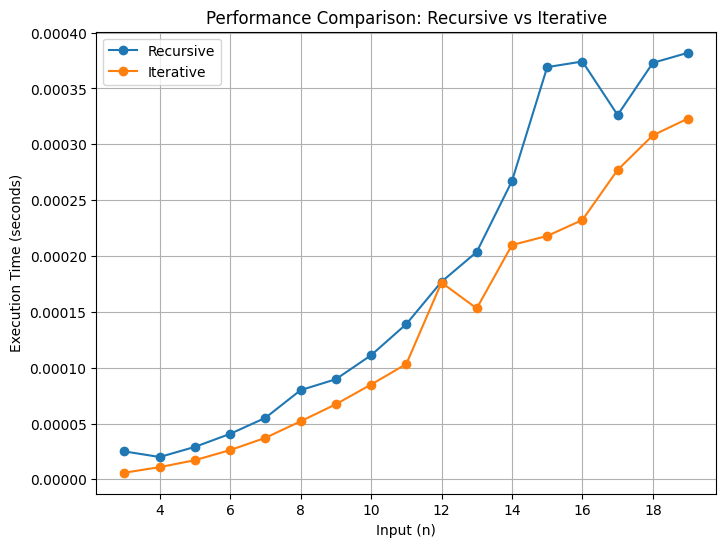

In [198]:
def main():

  for n in range(3,20):
    n_values.append(n)
    a = np.random.randint(1, 10, size=(n, n+1)).astype(float)
    start_time = time.time()
    gauss_elimination_recursive(a)
    recursive_times.append(time.time() - start_time)
    start_time = time.time()
    iterative_gauss(a)
    iterative_times.append(time.time() - start_time)

  print_execution_table()
  update_graph()



main()